<a href="https://colab.research.google.com/github/andregabos/Alura_One-Challenge_AluraStore/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [3]:
loja2.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Cadeira de escritório,moveis,378.20,20.421138,04/08/2021,Thiago Silva,MG,1,boleto,1,-18.10,-44.38
1,Pandeiro,instrumentos musicais,102.37,3.035334,26/11/2020,Bianca Santos,RJ,3,cartao_credito,4,-22.25,-42.66
2,Cama king,moveis,591.13,31.759020,22/10/2021,Thiago Silva,SC,5,cartao_credito,10,-27.45,-50.95
3,Cama king,moveis,1208.24,61.919584,04/05/2022,Larissa Alves,RS,5,cartao_credito,10,-30.17,-53.50
4,Cadeira de escritório,moveis,530.41,25.827176,26/02/2022,Lucas Oliveira,SP,4,cartao_credito,3,-22.19,-48.79


In [4]:
loja3.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Secadora de roupas,eletrodomesticos,1713.50,88.823159,17/12/2021,Camila Ribeiro,CE,4,cartao_credito,4,-5.20,-39.53
1,Cômoda,moveis,386.81,18.180908,10/02/2021,Larissa Alves,RS,3,cartao_credito,1,-30.17,-53.50
2,Violão,instrumentos musicais,404.62,23.197592,22/01/2023,Lucas Oliveira,SP,5,cartao_credito,3,-22.19,-48.79
3,Bola de vôlei,esporte e lazer,78.40,4.463341,22/03/2022,Pedro Gomes,BA,4,cartao_credito,6,-13.29,-41.71
4,Guarda roupas,moveis,694.76,34.578319,12/01/2022,Bianca Santos,SP,1,cartao_credito,1,-22.19,-48.79


In [5]:
loja4.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Lava louças,eletrodomesticos,1446.46,74.604083,11/11/2022,Rafael Costa,SP,4,cartao_credito,3,-22.19,-48.79
1,Cama box,moveis,631.70,33.919251,03/01/2020,Thiago Silva,GO,5,cartao_credito,2,-15.98,-49.86
2,Bola de basquete,esporte e lazer,31.54,0.000000,25/12/2022,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
3,Modelagem preditiva,livros,76.93,1.680730,23/11/2021,Lucas Oliveira,MG,3,boleto,1,-18.10,-44.38
4,Fone de ouvido,eletronicos,185.14,7.442587,25/04/2022,Bianca Santos,SP,4,cartao_credito,7,-22.19,-48.79


#1. Análise do faturamento


In [6]:
def formatar_em_reais(valor):
    return f"R$ {valor:,.2f}".translate(str.maketrans(".,", ",."))

print('Faturamento Loja 1:', formatar_em_reais(loja1['Preço'].sum()))
print('Faturamento Loja 2:', formatar_em_reais(loja2['Preço'].sum()))
print('Faturamento Loja 3:', formatar_em_reais(loja3['Preço'].sum()))
print('Faturamento Loja 4:', formatar_em_reais(loja4['Preço'].sum()))


Faturamento Loja 1: R$ 1.534.509,12
Faturamento Loja 2: R$ 1.488.459,06
Faturamento Loja 3: R$ 1.464.025,03
Faturamento Loja 4: R$ 1.384.497,58


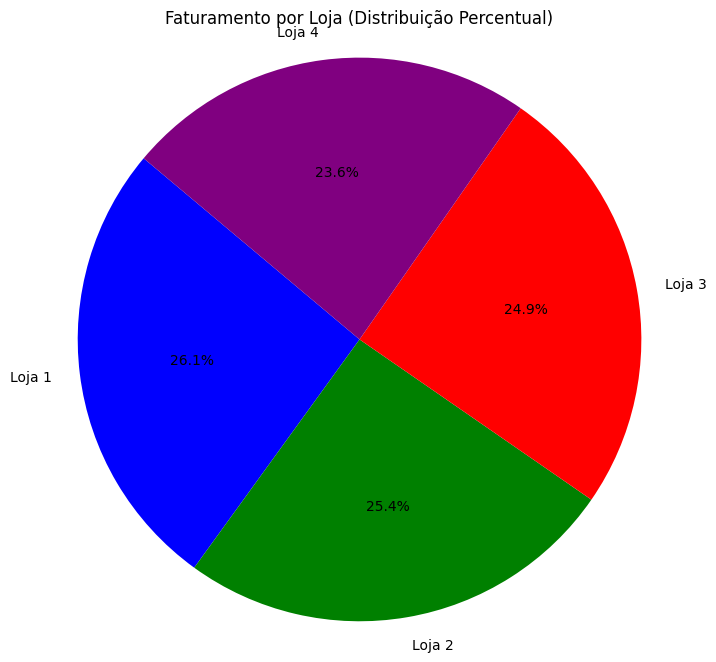

In [7]:
faturamento = {
    'Loja 1': loja1['Preço'].sum(),
    'Loja 2': loja2['Preço'].sum(),
    'Loja 3': loja3['Preço'].sum(),
    'Loja 4': loja4['Preço'].sum()
}

lojas = list(faturamento.keys())
valores = list(faturamento.values())

labels = lojas
sizes = valores
colors = ['blue', 'green', 'red', 'purple']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Faturamento por Loja (Distribuição Percentual)')
plt.savefig('faturamento.png')

plt.show()

In [8]:
import os

print('faturamento.png existe?', os.path.exists('faturamento.png'))

faturamento.png existe? True


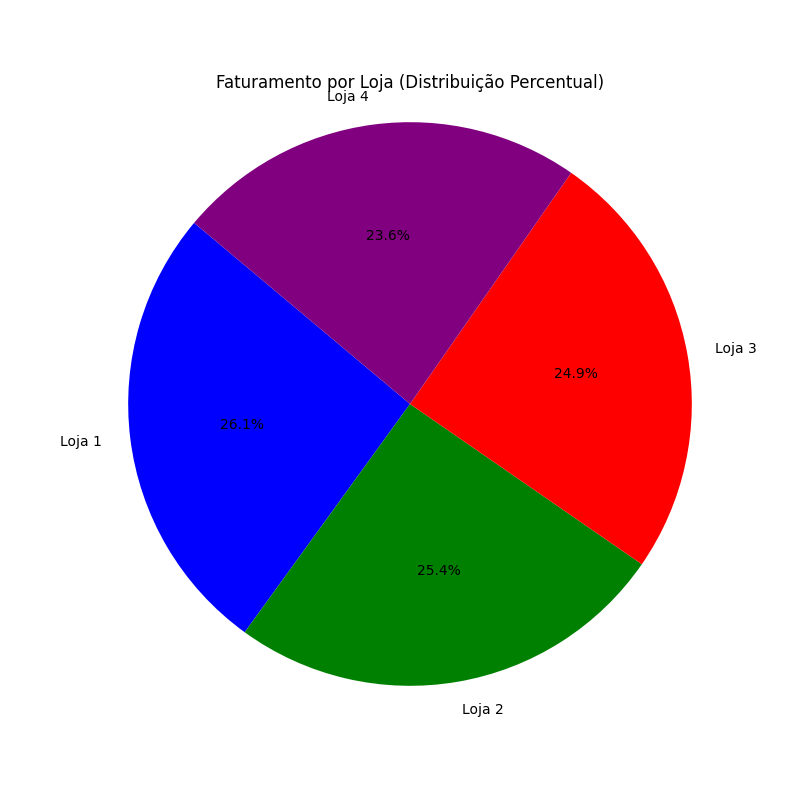

In [9]:
from IPython.display import Image, display

display(Image('faturamento.png'))

# 2. Vendas por Categoria


In [67]:
def vendas_por_categoria(df, nome_loja):
  vendas_categoria = df['Categoria do Produto'].value_counts()
  print(f"\nVendas por Categoria para {nome_loja}:")
  print(vendas_categoria)
  print("\n")

vendas_por_categoria(loja1, "Loja 1")
vendas_por_categoria(loja2, "Loja 2")
vendas_por_categoria(loja3, "Loja 3")
vendas_por_categoria(loja4, "Loja 4")


Vendas por Categoria para Loja 1:
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64



Vendas por Categoria para Loja 2:
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64



Vendas por Categoria para Loja 3:
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64



Vendas por Categoria para Loja 4:
Categoria do Prod

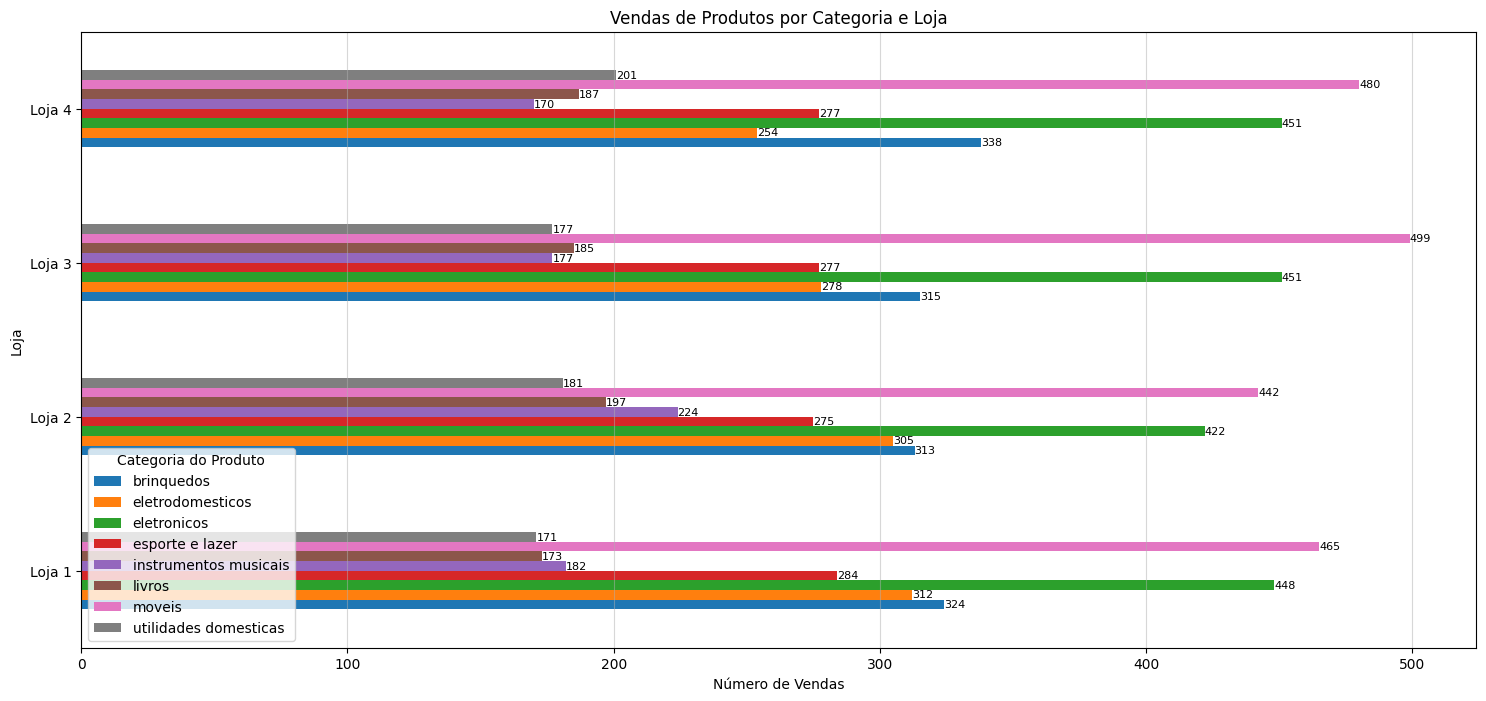

In [70]:
loja1['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

todas_lojas = pd.concat([loja1, loja2, loja3, loja4])

vendas_por_categoria_loja = todas_lojas.groupby(['Loja', 'Categoria do Produto']).size().unstack(fill_value=0)

ax = vendas_por_categoria_loja.plot(kind='barh', figsize=(18, 8))

plt.title('Vendas de Produtos por Categoria e Loja')
plt.xlabel('Número de Vendas')
plt.ylabel('Loja')
plt.legend(title='Categoria do Produto', loc='lower left')
plt.grid(axis='x', alpha=0.5)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8)

plt.show()

# 3. Média de Avaliação das Lojas

In [51]:
loja1['Avaliação da compra'].count()

np.int64(2359)

In [52]:
def media_de_avaliacao(df, nome_loja):
  #media_avaliacao = (df['Avaliação da compra'].sum() / df['Avaliação da compra'].count())
  media_avaliacao = df['Avaliação da compra'].mean()
  print(f"Média de avaliação para {nome_loja}: {media_avaliacao:.2f}")


media_de_avaliacao(loja1, "Loja 1")
media_de_avaliacao(loja2, "Loja 2")
media_de_avaliacao(loja3, "Loja 3")
media_de_avaliacao(loja4, "Loja 4")

Média de avaliação para Loja 1: 3.98
Média de avaliação para Loja 2: 4.04
Média de avaliação para Loja 3: 4.05
Média de avaliação para Loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [53]:
def avalia_produtos(df, nome_loja, quatidade):
  vendas_produtos = df['Produto'].value_counts()
  mais_vendidos = vendas_produtos.head(quatidade)
  menos_vendidos = vendas_produtos.tail(quatidade)
  return mais_vendidos, menos_vendidos

for loja_df, nome_loja in zip([loja1, loja2, loja3, loja4], ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]):
  mais_vendidos, menos_vendidos = avalia_produtos(loja_df, nome_loja, 3)
  print(f"Mais Vendidos para {nome_loja}:")
  print(mais_vendidos)
  print("\n")
  print(f"Menos Vendidos para {nome_loja}:")
  print(menos_vendidos)
  print("\n")

Mais Vendidos para Loja 1:
Produto
Micro-ondas      60
TV Led UHD 4K    60
Guarda roupas    60
Name: count, dtype: int64


Menos Vendidos para Loja 1:
Produto
Panela de pressão    35
Headset              33
Celular ABXY         33
Name: count, dtype: int64


Mais Vendidos para Loja 2:
Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Name: count, dtype: int64


Menos Vendidos para Loja 2:
Produto
Mesa de jantar       34
Impressora           34
Jogo de tabuleiro    32
Name: count, dtype: int64


Mais Vendidos para Loja 3:
Produto
Kit banquetas     57
Mesa de jantar    56
Cama king         56
Name: count, dtype: int64


Menos Vendidos para Loja 3:
Produto
Mochila             36
Micro-ondas         36
Blocos de montar    35
Name: count, dtype: int64


Mais Vendidos para Loja 4:
Produto
Cama box                   62
Faqueiro                   59
Dashboards com Power BI    56
Name: count, dtype: int64


Menos Vendidos para Loja 4:
Produto
V

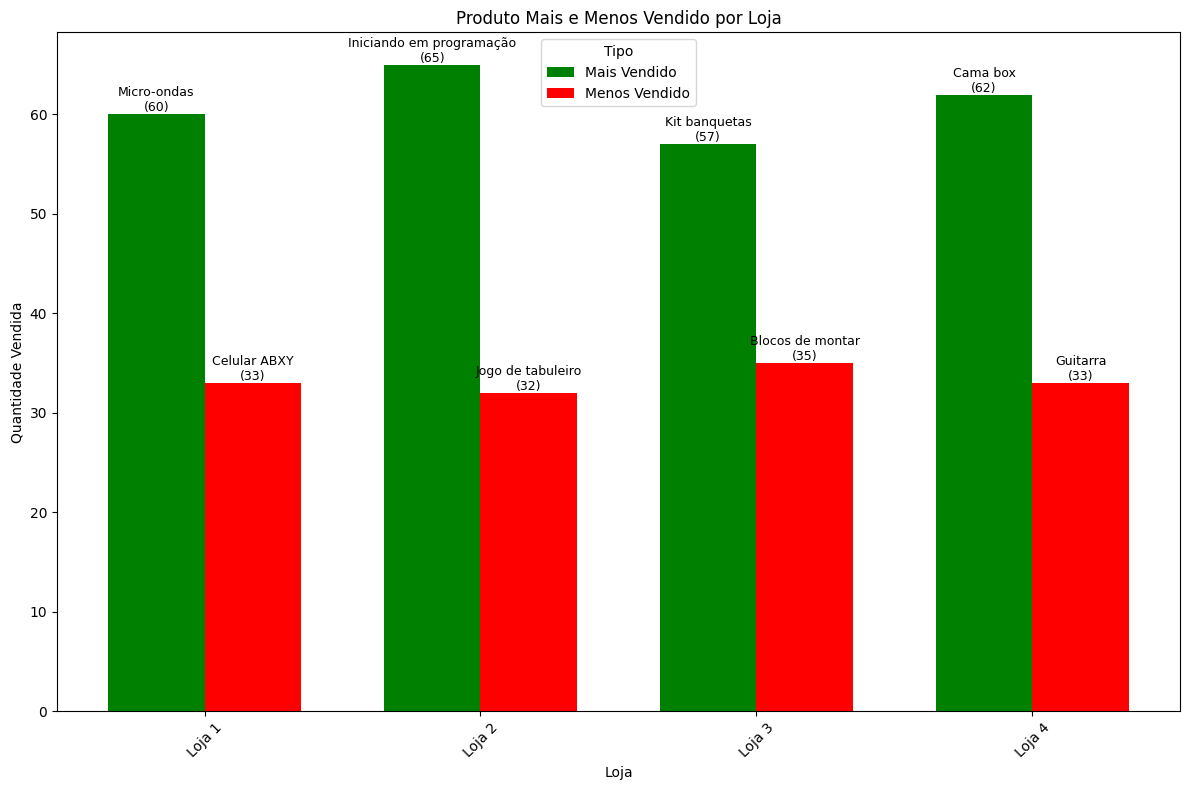

In [63]:
mais_vendidos = {}
menos_vendidos = {}
nomes_mais = {}
nomes_menos = {}


for loja_df, nome_loja in zip([loja1, loja2, loja3, loja4], ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]):
    mais, menos = avalia_produtos(loja_df, nome_loja, 1)
    nomes_mais[nome_loja] = mais.index[0]
    nomes_menos[nome_loja] = menos.index[0]
    mais_vendidos[nome_loja] = mais.iloc[0]
    menos_vendidos[nome_loja] = menos.iloc[0]


lojas = list(mais_vendidos.keys())
x = np.arange(len(lojas))
valores_mais = list(mais_vendidos.values())
valores_menos = list(menos_vendidos.values())
largura = 0.35

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(x - largura/2, valores_mais, width=largura, label='Mais Vendido', color='green')
ax.bar(x + largura/2, valores_menos, width=largura, label='Menos Vendido', color='red')

ax.set_title('Produto Mais e Menos Vendido por Loja')
ax.set_xlabel('Loja')
ax.set_ylabel('Quantidade Vendida')
ax.set_xticks(x)
ax.set_xticklabels(lojas, rotation=45)
ax.legend(title='Tipo')

for i in range(len(x)):
    loja = lojas[i]

    nome_mais = nomes_mais[loja]
    valor_mais = valores_mais[i]
    ax.text(x[i] - largura/2, valor_mais, f"{nome_mais}\n({valor_mais})", ha='center', va='bottom', fontsize=9)

    nome_menos = nomes_menos[loja]
    valor_menos = valores_menos[i]
    ax.text(x[i] + largura/2, valor_menos, f"{nome_menos}\n({valor_menos})", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [64]:
def media_de_frete(df, nome_loja):
  #media_frete = (df['Frete'].sum() / df['Frete'].count())
  media_frete = df['Frete'].mean()
  media_frete_formatada = formatar_em_reais(media_frete)
  print(f"Média de gastos com frete para {nome_loja}: {media_frete_formatada}")


media_de_frete(loja1, "Loja 1")
media_de_frete(loja2, "Loja 2")
media_de_frete(loja3, "Loja 3")
media_de_frete(loja4, "Loja 4")

Média de gastos com frete para Loja 1: R$ 34,69
Média de gastos com frete para Loja 2: R$ 33,62
Média de gastos com frete para Loja 3: R$ 33,07
Média de gastos com frete para Loja 4: R$ 31,28


# **RELATÓRIO DE ANÁLISE PARA VENDA DE LOJA**

## **Introdução**

Este relatório apresenta uma análise detalhada do desempenho de quatro lojas, com o objetivo de recomendar qual unidade seria mais adequada para venda, conforme solicitado pelo proprietário, o Sr. João. A análise contempla cinco indicadores principais: faturamento total, categorias de produtos vendidos, avaliação dos clientes, produtos mais e menos vendidos, e custo médio de frete.
Os dados foram processados utilizando ferramentas de análise de dados para garantir uma visão abrangente e objetiva do desempenho de cada unidade.

## **Análise dos Dados**

#### **1. Faturamento Total**

A análise do faturamento revela uma disparidade significativa entre as lojas:

 Loja         |     Faturamento
--------------|-----------------
 Loja 1       |  R\$ 1.534.509,12
 Loja 2       |  R\$ 1.488.459,06
 Loja 3       |  R\$ 1.464.025,03
 Loja 4       |  R\$ 1.384.497,58

Conforme visualizado no gráfico gerado, existe uma distribuição desigual de faturamento entre as quatro unidades, o que representa um primeiro indicador para nossa decisão.

#### **2. Vendas por Categoria de Produto**

A análise demonstrou diferenças por categoria em cada loja e, analisando mais profundamente os dados, podemos identificar tendências importantes que impactam o faturamento e o potencial de crescimento futuro de cada loja:

A **Loja 1**, apesar de não liderar em móveis (465) ou eletrônicos (448), apresenta um desempenho consistente e equilibrado nestas categorias de alto valor agregado, além de se destacar em brinquedos (324) e liderar em eletrodomésticos (312) e esportes e lazer (284). Este equilíbrio nas categorias pode explicar seu faturamento superior às demais lojas.

A **Loja 2** destaca-se pelo equilíbrio, com o melhor desempenho em instrumentos musicais (224) e o segundo melhor em livros (197). Esta diversificação é estrategicamente valiosa, pois reduz a dependência de categorias específicas e demonstra capacidade de atrair públicos diversos, o que pode representar maior potencial de crescimento a longo prazo.

A **Loja 3** lidera significativamente em móveis (499 unidades), uma categoria de alto valor, o que pode justificar em parte sua posição entre as mais rentáveis. Esta liderança em móveis representa uma vantagem competitiva importante, pois esta categoria tende a gerar maior margem de contribuição por venda.

A **Loja 4**, embora tenha números bons em móveis (480) e eletrônicos (451), apresenta a maior disparidade entre categorias de alto e baixo desempenho. Sua fraqueza em instrumentos musicais (170 unidades, o menor entre as lojas) representa uma oportunidade perdida em uma categoria de alto valor, o que pode comprometer seu potencial de crescimento futuro. Por outro lado, esta loja surpreendentemente lidera em utilidades domésticas (201), uma categoria tipicamente de menor valor, o que pode explicar seu faturamento inferior.

#### **3. Média de Avaliações dos Clientes**

A satisfação dos clientes, medida através das avaliações, apresentou os seguintes resultados:

| Loja | Média de Avaliação |
|------|-------------------|
| Loja 1 | 3,98 |
| Loja 2 | 4,04 |
| Loja 3 | 4,05 |
| Loja 4 | 4,00 |

Este indicador é essencial para entender a percepção dos clientes sobre cada unidade e seu potencial de fidelização a longo prazo. Embora as diferenças entre as avaliações possam parecer pequenas à primeira vista, elas representam tendências importantes sobre a experiência do cliente e impactam diretamente a decisão de venda.

A **Loja 3** apresenta a melhor avaliação média, seguida de perto pela **Loja 2**. Esta pequena diferença de 0,01 ponto pode não parecer significativa isoladamente, mas quando analisada em conjunto com o desempenho em móveis (categoria em que a Loja 3 lidera), pode sugerir uma correlação entre qualidade de atendimento e vendas em categorias de alto valor.

A **Loja 1**, apesar de ter o maior faturamento, apresenta a menor avaliação média, ficando 0,07 ponto abaixo da melhor avaliada. Isso pode indicar oportunidades de melhoria na experiência do cliente que, se implementadas, poderiam potencializar ainda mais seu já expressivo desempenho financeiro.

A **Loja 4** fica em posição intermediária, mas ainda abaixo das Lojas 2 e 3. Considerando seu menor faturamento, essa avaliação média sugere que os desafios da unidade vão além da percepção do cliente, estando possivelmente mais relacionados aos produtos e às estratégias de precificação.

Estas avaliações não devem ser analisadas isoladamente, mas como parte de um contexto mais amplo. Uma loja com avaliação ligeiramente inferior pode ser mantida se apresentar outros indicadores fortes, como é o caso da Loja 1. Por outro lado, avaliações positivas como as das Lojas 2 e 3 representam um ativo intangível valioso que deve ser considerado na decisão estratégica de venda.

#### **4. Produtos Mais e Menos Vendidos**

A análise identificou os seguintes padrões:

**Loja 1**: Os produtos mais vendidos foram Micro-ondas, TV Led UHD 4K e Guarda-roupas (todos com 60 unidades), enquanto os menos vendidos foram Celular ABXY e Headset (ambos com 33 unidades) e Panela de pressão (35 unidades).

**Loja 2**: Destaca-se "Iniciando em programação" como campeão de vendas (65 unidades), seguido de Micro-ondas (62) e Bateria (61). Os menos vendidos foram Jogo de tabuleiro (32), Impressora (34) e Mesa de jantar (34).

**Loja 3**: Tem como destaques Kit banquetas (57), Mesa de jantar e Cama king (ambos com 56). Os menos vendidos foram Blocos de montar (35), Micro-ondas (36) e Mochila (36).

**Loja 4**: Lidera com Cama box (62), Faqueiro (59) e Dashboards com Power BI (56), enquanto os menos vendidos são Guitarra (33), Guarda-roupas (34) e Violão (37)

A análise dos produtos mais e menos vendidos revela padrões significativos que complementam as conclusões anteriores sobre o desempenho das lojas.

A **Loja 1** apresenta uma característica notável: seus três produtos mais vendidos pertencem a três categorias diferentes (eletrodomésticos, eletrônicos e móveis), com exatamente o mesmo volume de vendas (60 unidades cada). Esta uniformidade sugere uma estratégia de marketing equilibrada e eficaz entre categorias de alto valor, o que pode explicar seu maior faturamento total. O fato de seus produtos menos vendidos incluírem um Celular ABXY (33 unidades) indica uma possível oportunidade de melhoria na categoria de eletrônicos portáteis.

A **Loja 2** revela uma força surpreendente em livros, com "Iniciando em programação" liderando as vendas (65 unidades), o que é coerente com seu bom desempenho geral nesta categoria. Este dado é particularmente interessante quando consideramos que livros normalmente possuem margens maiores que muitos produtos eletrônicos. A presença de Bateria (61 unidades) entre os mais vendidos também reforça sua força em instrumentos musicais identificada anteriormente.

A **Loja 3** apresenta uma clara especialização em móveis para casa, com seus três produtos mais vendidos pertencendo a esta categoria (Kit banquetas, Mesa de jantar e Cama king). Esta concentração de sucesso em móveis, categoria de alto valor, explica seu bom faturamento mesmo com avaliações de cliente ligeiramente superiores. Curiosamente, o Micro-ondas, que é um dos campeões de vendas nas Lojas 1 e 2, aparece entre os menos vendidos na Loja 3 (36 unidades).

A **Loja 4** revela um contraste preocupante: enquanto Cama box lidera suas vendas (62 unidades), Guarda-roupas está entre os menos vendidos (34 unidades). Este desbalanceamento em produtos complementares da mesma categoria (móveis para quarto) sugere possíveis problemas de gestão de estoque ou precificação. Ainda mais revelador é que dois de seus produtos menos vendidos são instrumentos musicais (Guitarra e Violão), confirmando sua fraqueza nessa categoria de alto valor, identificada na análise anterior.

Estas inconsistências no portfólio da Loja 4, especialmente a dificuldade em vender produtos complementares aos seus campeões de venda, sugerem desafios estruturais que podem ser difíceis de superar sem investimentos significativos em reposicionamento.

#### 5. Frete Médio

O custo logístico representado pelo frete médio é um indicador crucial que impacta diretamente a rentabilidade e a eficiência operacional de cada unidade. Analisando os dados apresentados:

| Loja | Frete Médio |
|------|-------------|
| Loja 1 | R\$ 34,69 |
| Loja 2 | R\$ 33,62 |
| Loja 3 | R\$ 33,07 |
| Loja 4 | R\$ 31,28 |

A **Loja 1**, apesar de apresentar o maior custo médio de frete, mantém o maior faturamento entre todas as unidades (R$ 1.534.509,12). Esta correlação sugere que a loja consegue compensar seus maiores custos logísticos através de um mix de produtos mais rentável e/ou maior eficiência em outras áreas operacionais.

A **Loja 2** apresenta um valor intermediário de frete, alinhado com seu desempenho equilibrado nos demais indicadores. Com a segunda melhor avaliação de clientes (4,04) e diversidade de produtos, incluindo destaque em livros e instrumentos musicais, esta loja parece ter encontrado um ponto ótimo entre custos logísticos e satisfação do cliente.

A **Loja 3** demonstra um equilíbrio interessante entre custos logísticos moderados e uma alta avaliação de clientes (4,05), sugerindo que sua estrutura de distribuição oferece uma boa relação custo-benefício. Esta combinação é particularmente relevante considerando sua especialização em móveis, categoria que tipicamente demanda uma logística mais complexa devido ao volume e fragilidade dos produtos.

A **Loja 4** apresenta o menor custo médio de frete, o que inicialmente pode ser interpretado como uma vantagem. Este valor é 10,9% inferior ao da Loja 1, que possui o maior custo logístico. Em um cenário de volumes equivalentes de vendas, esta diferença representaria uma economia operacional significativa, no entanto, esta aparente vantagem precisa ser contextualizada dentro do desempenho global da loja e, considerando que a Loja 4 tem o menor faturamento (R$ 1.384.497,58) mesmo com o menor custo de frete, podemos inferir que este benefício operacional não se traduz efetivamente em vantagem competitiva.

## **Análise Integrada**

Após examinar os cinco indicadores-chave de desempenho das quatro lojas da rede AluraStore, é possível extrair conclusões estratégicas que integram estas diferentes dimensões de análise e fornecem uma visão holística para embasar a decisão de venda.

#### **Especialização versus diversificação**

A análise das categorias de produtos revela estratégias distintas entre as lojas:

A especialização da Loja 3 em móveis representa uma fortaleza significativa em uma categoria de alto valor, o que compensa seu desempenho mais modesto em outras áreas. Esta especialização, combinada com sua excelente avaliação de clientes, indica uma proposição de valor clara e bem executada.

Em contraste, a diversificação bem-sucedida da Loja 2 em múltiplas categorias, especialmente instrumentos musicais e livros, sugere maior resiliência a flutuações de mercado e potencial superior para crescimento sustentável a longo prazo.

A Loja 4, embora apresente números razoáveis em algumas categorias, não demonstra nem especialização eficaz nem diversificação bem-sucedida - uma indefinição estratégica que compromete seu desempenho global e potencial futuro.

#### **Consistência na execução**

Um padrão crucial que emerge da análise integrada é a importância da consistência na execução da estratégia comercial:

A Loja 1 não lidera isoladamente nas maiores categorias, mas mantém desempenho sólido e uniforme em múltiplas frentes, exemplificado pela distribuição equilibrada de seus produtos mais vendidos em diferentes categorias.

A inconsistência da Loja 4 é evidenciada pelo contraste entre seu produto campeão de vendas e o fraco desempenho em um item naturalmente complementar.

Esta incapacidade de concretizar vendas cruzadas entre produtos complementares revela deficiências fundamentais em sua abordagem comercial.

Esta análise sugere que a consistência na execução da estratégia, independentemente de qual seja ela, é um preditor mais confiável de sucesso sustentável do que picos isolados de desempenho em produtos ou categorias específicas.

#### **A eficiência logística em contexto**

A vantagem da Loja 4 em termos de frete médio representa um caso interessante de eficiência operacional que não se traduz em vantagem competitiva significativa:

* Este menor custo logístico não foi suficiente para elevar seu faturamento, que permanece o mais baixo entre todas as lojas.

* A economia em frete não resultou em avaliações superiores de clientes, sugerindo que esta eficiência pode estar sendo obtida às custas da qualidade do serviço

* As Lojas 2 e 3, com custos de frete intermediários e as melhores avaliações de clientes, demonstram um equilíbrio mais eficaz entre economia operacional e satisfação do consumidor

Esta conclusão é particularmente relevante por demonstrar que eficiências operacionais isoladas têm valor estratégico limitado quando não se refletem em melhorias na proposta de valor ao cliente ou no desempenho financeiro global.

#### **O valor estratégico de produtos de alta margem**

A análise dos produtos mais vendidos por loja revela insights importantes sobre a composição do faturamento:

A Loja 2, com "Iniciando em programação" como campeão de vendas e forte desempenho em instrumentos musicais, demonstra capacidade superior em categorias tradicionalmente associadas a margens mais elevadas. Esta vantagem qualitativa em seus produtos explica como ela mantém o segundo maior faturamento apesar de não liderar em volume total de vendas.

Em contrapartida, a Loja 4, apesar de números absolutos razoáveis em móveis e eletrônicos, apresenta fraqueza precisamente em categorias de maior valor agregado como instrumentos musicais. Esta deficiência em categorias de alta margem representa uma limitação estrutural para seu crescimento futuro.

Esta conclusão é estrategicamente relevante por indicar que o potencial de crescimento de longo prazo está mais fortemente associado à capacidade de ter sucesso em categorias de alta margem do que ao volume absoluto de vendas.

#### **Sinergia entre unidades**
Considerando o desempenho das lojas, e assumindo que são parte de uma rede integrada, emergem conclusões importantes sobre a sinergia potencial entre unidades:

As Lojas 1, 2 e 3 apresentam perfis complementares que, juntas, formam um ecossistema comercial equilibrado:

* A Loja 1 oferece eficiência operacional e volume de vendas
* A Loja 2 proporciona diversificação e forte desempenho em categorias de alta margem
* A Loja 3 contribui com especialização em móveis e excelência no atendimento ao cliente

A Loja 4, por outro lado, apresenta um perfil que replica parcialmente características já existentes nas outras unidades, sem adicionar vantagens competitivas distintas ou complementares à rede como um todo.

Esta análise de complementaridade entre unidades é fundamental para uma decisão estratégica que vise não apenas eliminar a loja de menor desempenho, mas também fortalecer a coesão e eficácia da rede remanescente.

#### **A aparente contradição entre faturamento e satisfação do cliente**

Um dos padrões mais interessantes identificados é a correlação inversa entre faturamento e avaliação dos clientes. A Loja 1, com o melhor desempenho financeiro, apresenta a menor média de avaliação, enquanto a Loja 3, com a melhor avaliação, ocupa apenas a terceira posição em faturamento.

Esta contradição aparente sugere diferentes modelos de negócio e estratégias competitivas:

* A Loja 1 possivelmente adota uma estratégia de alto volume e rotatividade, priorizando eficiência operacional sobre a experiência personalizada
* As Lojas 2 e 3 parecem privilegiar a qualidade do atendimento e fidelização, potencialmente sacrificando oportunidades de vendas imediatas em favor de relacionamentos de longo prazo

Esta dinâmica pode ser particularmente significativa para a tomada de decisão estratégica, pois indica que ambos os modelos de negócio podem ser viáveis dentro da rede, desde que executados com consistência.

A integração destas conclusões demonstra que o desempenho de cada loja deve ser avaliado não apenas pelos seus indicadores isolados, mas pela combinação destes fatores e seu impacto no futuro. Esta visão holística, que considera tanto aspectos quantitativos quanto qualitativos do desempenho, fornece uma base sólida para a tomada de decisão estratégica sobre qual unidade seria mais adequada para venda.

### Conclusão

Após análise minuciosa dos cinco indicadores-chave de desempenho, recomendamos ao Sr. João a venda da Loja 4. Esta decisão fundamenta-se em evidências consistentes que apontam esta unidade como a candidata mais adequada para desinvestimento.

O desempenho financeiro da Loja 4 é o mais frágil da rede, com faturamento de R\$ 1.384.497,58, aproximadamente 10% inferior ao da loja líder. Este resultado não representa apenas um número isolado, mas reflete fragilidades estruturais que comprometem seu potencial de crescimento futuro.

A Loja 4 sofre de indefinição estratégica, não alcançando excelência nem em especialização nem em diversificação. Sua particular fraqueza em instrumentos musicais exemplifica sua dificuldade em desenvolver categorias de alto valor agregado e margens superiores.

As inconsistências no portfolio desta unidade são evidentes no contraste entre o sucesso nas vendas de Cama box e o fraco desempenho em Guarda-roupas – produtos complementares que normalmente impulsionam vendas cruzadas. Esta ineficiência sugere desafios operacionais que demandariam investimentos significativos para serem superados.

Embora a Loja 4 apresente o menor custo médio de frete, esta vantagem isolada não compensa as deficiências nas demais áreas. A economia de R\$ 3,41 por entrega não justifica um faturamento aproximadamente R\$ 150.000,00 menor que a loja líder.

As Lojas 1, 2 e 3 formam um conjunto complementar e equilibrado: a Loja 1 se destaca pela eficiência operacional e volume de vendas, a Loja 2 pela diversificação em categorias de alta margem, e a Loja 3 pela especialização em móveis e excelência no atendimento. A Loja 4, em contraste, replica parcialmente características já existentes, sem adicionar vantagens competitivas distintas à rede.

A venda desta unidade permitirá concentrar recursos e atenção gerencial nas três lojas remanescentes, potencializando seus pontos fortes complementares e maximizando o valor de longo prazo da rede como um todo.

